In [6]:
import pandas as pd
import numpy as np
from  sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import phenograph
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data_dir = "/home/ucsd-train13/scratch/projects/organoids/results/processed_files/"

In [8]:
zscore_variable_genes = pd.read_csv(data_dir+"tpm_all_vg_0.02_zscores.csv", index_col=0)
print(zscore_variable_genes.shape)
zscore_variable_genes.head()

(2827, 5882)


,FBWT2_CAGGCATCTCCG,FBWT2_TCACCAGTCTCG,FBWT2_CCCGAGTCATAC,FBWT2_CGCTTACGTCTT,FBWT2_TTCCATATAGCT,FBWT2_TCCCGACCATAA,FBWT2_TAGTGATTATCA,FBWT2_GCCTCCATCGTT,FBWT2_GTACGATCAAGC,FBWT2_TAAACGTCACGG,...,FBIVS2_CGTTCGAGACCC,FBIVS2_ATACGCTCCCCA,FBIVS2_AGTGGTTTGTGG,FBIVS2_TTCGGACCGGTC,FBIVS2_AATGCGGCAGTA,FBIVS2_TATAGTATAAAG,FBIVS2_CAACAGGGTTCG,FBIVS2_ACGGGTAGTCTA,FBIVS2_GGGCGCGGTCTG,FBIVS2_AGGCATTATCCT
GENE,,,,,,,,,,,,,,,,,,,,,
AAED1,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,...,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138,-0.148138
AARS2,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,...,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043,-0.108043
AASS,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,...,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354,-0.145354
ABCA1,-0.175985,-0.175985,-0.175985,0.433527,-0.175985,-0.175985,-0.175985,-0.175985,-0.175985,-0.175985,...,-0.175985,-0.175985,-0.175985,-0.175985,-0.175985,-0.175985,-0.175985,-0.175985,-0.175985,-0.175985
ABCC4,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,...,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609,-0.104609


In [9]:
#Initiate a PCA object to be calculated with 300 components. 
pca = PCA(n_components=300)

#Fit our data with this PCA and save the result. PCA requires the samples (cells) to be the rows of the dataframe and 
#the measurements (genes) to be the columns. So we are going to transpose our dataframe with .T
pca_result = pca.fit_transform(zscore_variable_genes.T)

Text(0,0.5,'cumulative explained variance')

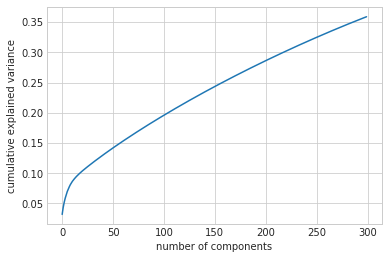

In [10]:
#make kneeplot to see where cumulative PCs form a knee 
sns.set_style("whitegrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

(0, 0.25)

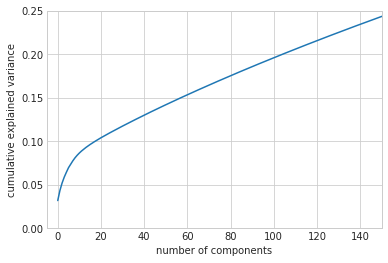

In [14]:
#change axis limits to zoom in on "knee"
sns.set_style("whitegrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim([-5,150])
plt.ylim([0,0.25])

In [15]:
pca_df = pd.DataFrame(pca_result)
pca_df.index = zscore_variable_genes.columns
print(pca_df.shape)
pca_df.head()

(5882, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
FBWT2_CAGGCATCTCCG,-5.865068,-0.049364,0.127693,0.127329,-3.402188,4.815458,5.882332,2.103216,1.078923,0.961223,...,0.092306,0.235882,-0.472837,0.097796,0.132050,-0.373262,-0.311027,-0.236047,-0.133387,-0.066040
FBWT2_TCACCAGTCTCG,-5.831806,-0.030148,0.142540,-0.057374,-2.990666,4.315587,4.602690,1.445309,0.957195,0.667404,...,-0.671691,0.415667,-0.026406,0.161763,-0.068710,-0.249385,-0.165768,0.334409,-0.112816,0.245391
FBWT2_CCCGAGTCATAC,-6.711742,0.396430,-0.591074,-0.346130,-2.017001,4.710635,4.095658,0.578867,-0.240465,0.573950,...,0.161394,0.101366,0.723440,0.170323,-0.051662,0.339189,-0.652103,0.274980,-0.052325,0.033003
FBWT2_CGCTTACGTCTT,-6.277129,0.127602,0.324711,-0.783303,-2.043496,4.362991,4.713549,1.933487,0.766027,2.088890,...,-0.181228,0.370397,0.259594,-0.115552,-0.441219,0.227321,0.440310,0.113695,0.178798,-0.281347
FBWT2_TTCCATATAGCT,-6.086714,0.020584,-1.209272,-0.717905,-2.417581,4.983209,5.254296,1.378734,-0.201542,1.574897,...,0.653529,-0.419060,-0.060669,-0.654814,-0.006030,-0.306318,-0.072218,-0.263672,0.911214,-0.632094


In [16]:
subset_PCA = pca_df[[0, 1]]
subset_PCA.head()

,0,1
FBWT2_CAGGCATCTCCG,-5.865068,-0.049364
FBWT2_TCACCAGTCTCG,-5.831806,-0.030148
FBWT2_CCCGAGTCATAC,-6.711742,0.396430
FBWT2_CGCTTACGTCTT,-6.277129,0.127602
FBWT2_TTCCATATAGCT,-6.086714,0.020584


In [17]:
sns.set_style('white')

g = sns.lmplot('x', 'y', subset_PCA, fit_reg=False, 
              scatter_kws={"s":25}, size=8)

KeyError: "['x' 'y'] not in index"

In [18]:
num_PCA_components_to_keep = 15

cols = list(range(num_PCA_components_to_keep))
subset = pca_df[cols]
print(subset.shape)
subset.head()
#to make subsetted dataframe that only contains the first 15 columns 

(5882, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
FBWT2_CAGGCATCTCCG,-5.865068,-0.049364,0.127693,0.127329,-3.402188,4.815458,5.882332,2.103216,1.078923,0.961223,0.268482,0.119929,0.489672,-0.355705,0.351606
FBWT2_TCACCAGTCTCG,-5.831806,-0.030148,0.142540,-0.057374,-2.990666,4.315587,4.602690,1.445309,0.957195,0.667404,0.726404,0.608784,1.113329,-0.602868,0.052530
FBWT2_CCCGAGTCATAC,-6.711742,0.396430,-0.591074,-0.346130,-2.017001,4.710635,4.095658,0.578867,-0.240465,0.573950,-0.141882,1.885342,1.765812,-0.202271,-2.018104
FBWT2_CGCTTACGTCTT,-6.277129,0.127602,0.324711,-0.783303,-2.043496,4.362991,4.713549,1.933487,0.766027,2.088890,-0.621219,0.345714,2.391694,0.672086,2.596057
FBWT2_TTCCATATAGCT,-6.086714,0.020584,-1.209272,-0.717905,-2.417581,4.983209,5.254296,1.378734,-0.201542,1.574897,1.446985,-0.256928,2.480156,0.522426,0.697208


In [19]:
communities_50, sparse_matrix50, Q50 = phenograph.cluster(subset, k=50)

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.7604022026062012 seconds
Jaccard graph constructed in 2.0451126098632812 seconds
Wrote graph to binary file in 0.7550935745239258 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.848917
After 2 runs, maximum modularity is Q = 0.851322
Louvain completed 22 runs in 5.3916027545928955 seconds
PhenoGraph complete in 9.003936052322388 seconds


In [20]:
communities_100, sparse_matrix100, Q100 = phenograph.cluster(subset, k=100)

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.9284777641296387 seconds
Jaccard graph constructed in 5.462013483047485 seconds
Wrote graph to binary file in 1.399500846862793 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.828787
After 3 runs, maximum modularity is Q = 0.830466
After 6 runs, maximum modularity is Q = 0.831593
Louvain completed 26 runs in 7.947106122970581 seconds
PhenoGraph complete in 15.810442686080933 seconds


In [21]:
communities_200, sparse_matrix200, Q200 = phenograph.cluster(subset, k=200)

Finding 200 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.1663508415222168 seconds
Jaccard graph constructed in 16.803297519683838 seconds
Wrote graph to binary file in 2.8280067443847656 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.796599
After 2 runs, maximum modularity is Q = 0.799003
Louvain completed 22 runs in 9.348254919052124 seconds
PhenoGraph complete in 30.29310178756714 seconds


In [22]:
communities_500, sparse_matrix500, Q500 = phenograph.cluster(subset, k=500)

Finding 500 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.479759931564331 seconds
Jaccard graph constructed in 99.86921787261963 seconds
Wrote graph to binary file in 6.5028908252716064 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.720211
After 4 runs, maximum modularity is Q = 0.721639
Louvain completed 24 runs in 15.584020376205444 seconds
PhenoGraph complete in 124.21151995658875 seconds


In [23]:
communities_20, sparse_matrix20, Q20 = phenograph.cluster(subset, k=20)

Finding 20 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.5248470306396484 seconds
Jaccard graph constructed in 0.9541888236999512 seconds
Wrote graph to binary file in 0.3322439193725586 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.869669
After 2 runs, maximum modularity is Q = 0.871255
After 3 runs, maximum modularity is Q = 0.873183
Louvain completed 23 runs in 4.962841272354126 seconds
PhenoGraph complete in 6.817171096801758 seconds


In [24]:
#make communities dictionary
names = ["community_500", "community_200", "community_100", "community_50", "community_20"]
arrays = [communities_500, communities_200, communities_100, communities_50, communities_20]
community_dict = dict(zip(names, arrays))
community_dict

{'community_500': array([5, 5, 5, ..., 3, 0, 0]),
 'community_200': array([2, 2, 2, ..., 9, 1, 1]),
 'community_100': array([2, 2, 2, ..., 9, 1, 1]),
 'community_50': array([3, 3, 3, ..., 9, 1, 1]),
 'community_20': array([2, 2, 2, ..., 9, 3, 6])}

In [25]:
#function to make tSNE based on several input parameters:
def make_tSNE(subset, perplexity, learning_rate, community_assignments_dict):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity,
               n_iter=1000, learning_rate=learning_rate)
    tsne_pca = tsne.fit_transform(subset)
    df = pd.DataFrame(tsne_pca, index = subset.index)
    df.rename(columns = {0:'x',1:'y'}, inplace=True)
    for key in community_assignments_dict.keys():
        df[key]=community_assignments_dict[key]
    return df

In [26]:
#call the function
tsne_pl50_lr150 = make_tSNE(pca_df, 150, 150, community_dict)

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 5882 samples in 0.121s...
[t-SNE] Computed neighbors for 5882 samples in 18.236s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5882
[t-SNE] Computed conditional probabilities for sample 2000 / 5882
[t-SNE] Computed conditional probabilities for sample 3000 / 5882
[t-SNE] Computed conditional probabilities for sample 4000 / 5882
[t-SNE] Computed conditional probabilities for sample 5000 / 5882
[t-SNE] Computed conditional probabilities for sample 5882 / 5882
[t-SNE] Mean sigma: 5.416150
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.460564
[t-SNE] Error after 1000 iterations: 1.791175


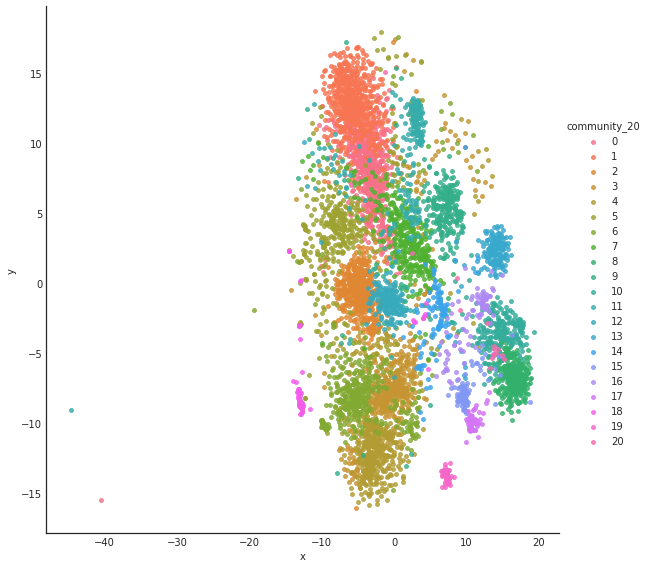

In [29]:
sns.set_style('white')

g = sns.lmplot('x', 'y', tsne_pl50_lr150, hue='community_20', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

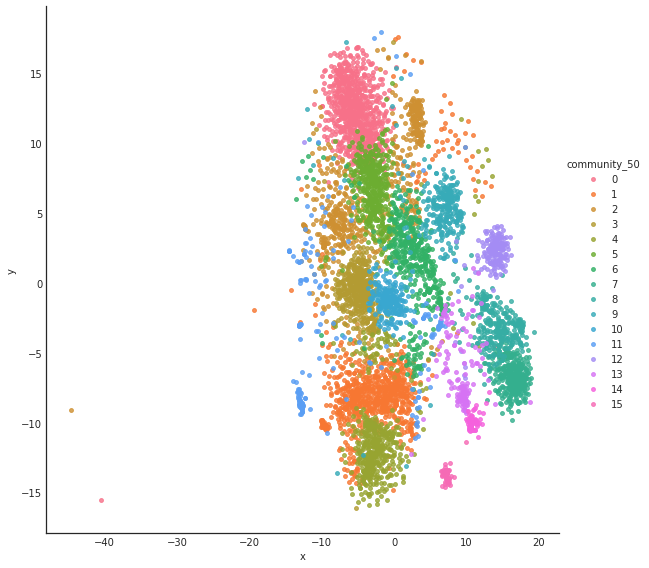

In [31]:
sns.set_style('white')

g = sns.lmplot('x', 'y', tsne_pl50_lr150, hue='community_50', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

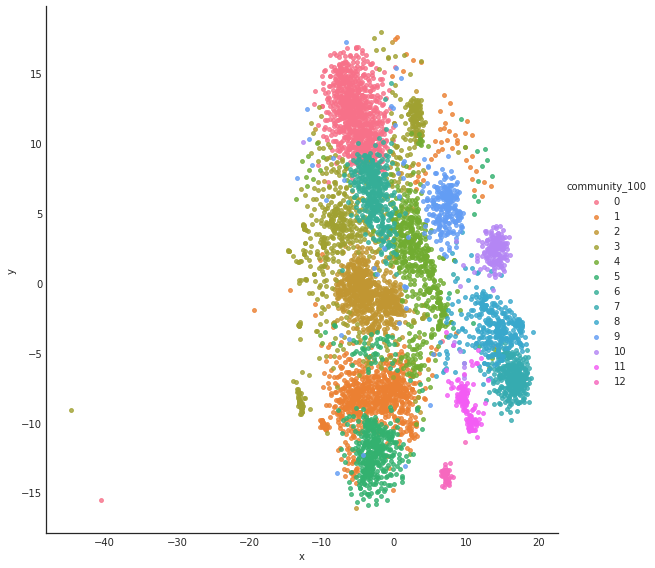

In [33]:
sns.set_style('white')

g = sns.lmplot('x', 'y', tsne_pl50_lr150, hue='community_100', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

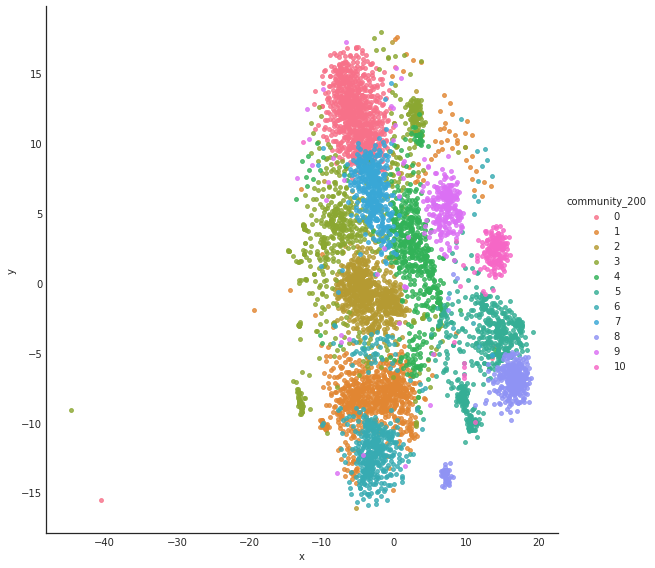

In [34]:
sns.set_style('white')

g = sns.lmplot('x', 'y', tsne_pl50_lr150, hue='community_200', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

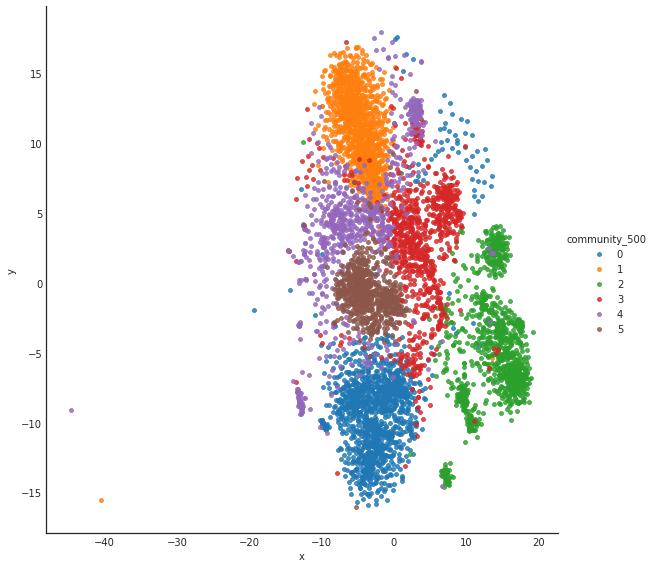

In [36]:
sns.set_style('white')

g = sns.lmplot('x', 'y', tsne_pl50_lr150, hue='community_500', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

In [37]:
#call the function
tsne_pl100_lr100 = make_tSNE(pca_df, 100, 100, community_dict)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5882 samples in 0.119s...
[t-SNE] Computed neighbors for 5882 samples in 17.958s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5882
[t-SNE] Computed conditional probabilities for sample 2000 / 5882
[t-SNE] Computed conditional probabilities for sample 3000 / 5882
[t-SNE] Computed conditional probabilities for sample 4000 / 5882
[t-SNE] Computed conditional probabilities for sample 5000 / 5882
[t-SNE] Computed conditional probabilities for sample 5882 / 5882
[t-SNE] Mean sigma: 5.123547
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.859604
[t-SNE] Error after 1000 iterations: 1.961559


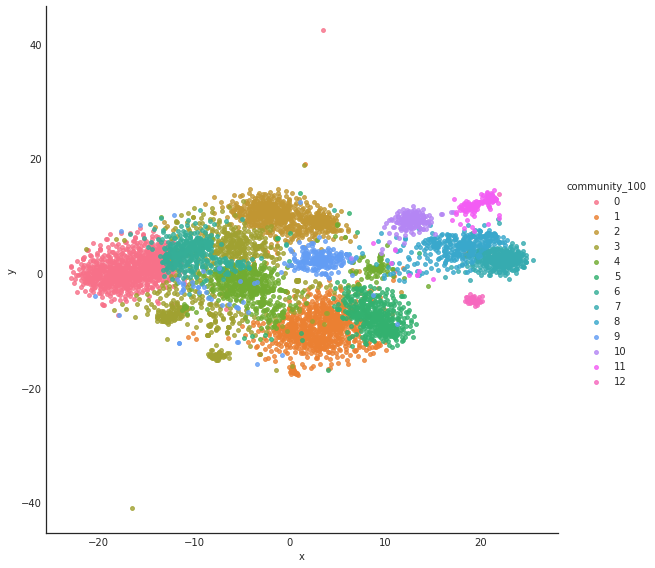

In [38]:
sns.set_style('white')

g = sns.lmplot('x', 'y', tsne_pl100_lr100, hue='community_100', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

In [39]:
#call the function
tsne_pl100_lr500 = make_tSNE(pca_df, 100, 500, community_dict)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5882 samples in 0.119s...
[t-SNE] Computed neighbors for 5882 samples in 18.003s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5882
[t-SNE] Computed conditional probabilities for sample 2000 / 5882
[t-SNE] Computed conditional probabilities for sample 3000 / 5882
[t-SNE] Computed conditional probabilities for sample 4000 / 5882
[t-SNE] Computed conditional probabilities for sample 5000 / 5882
[t-SNE] Computed conditional probabilities for sample 5882 / 5882
[t-SNE] Mean sigma: 5.123547
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.100441
[t-SNE] Error after 1000 iterations: 1.949289


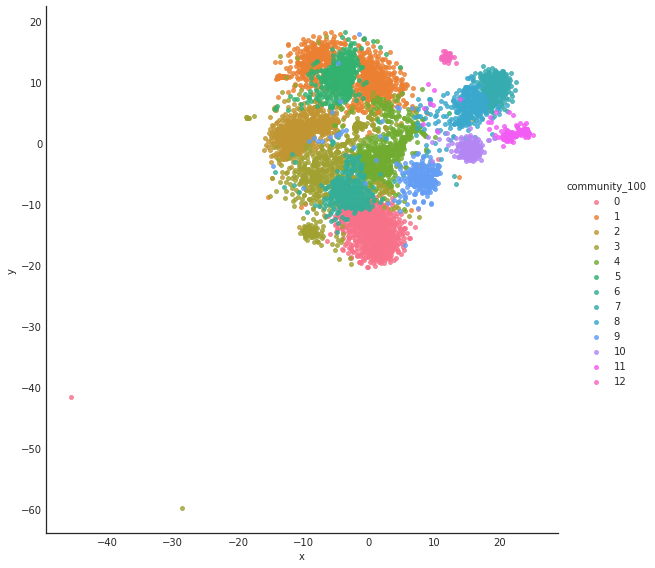

In [40]:
sns.set_style('white')

g = sns.lmplot('x', 'y', tsne_pl100_lr500, hue='community_100', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

In [41]:
#call the function
tsne_pl100_lr1000 = make_tSNE(pca_df, 100, 1000, community_dict)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5882 samples in 0.120s...
[t-SNE] Computed neighbors for 5882 samples in 17.961s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5882
[t-SNE] Computed conditional probabilities for sample 2000 / 5882
[t-SNE] Computed conditional probabilities for sample 3000 / 5882
[t-SNE] Computed conditional probabilities for sample 4000 / 5882
[t-SNE] Computed conditional probabilities for sample 5000 / 5882
[t-SNE] Computed conditional probabilities for sample 5882 / 5882
[t-SNE] Mean sigma: 5.123547
[t-SNE] KL divergence after 250 iterations with early exaggeration: 111.662315
[t-SNE] Error after 1000 iterations: 1.942376


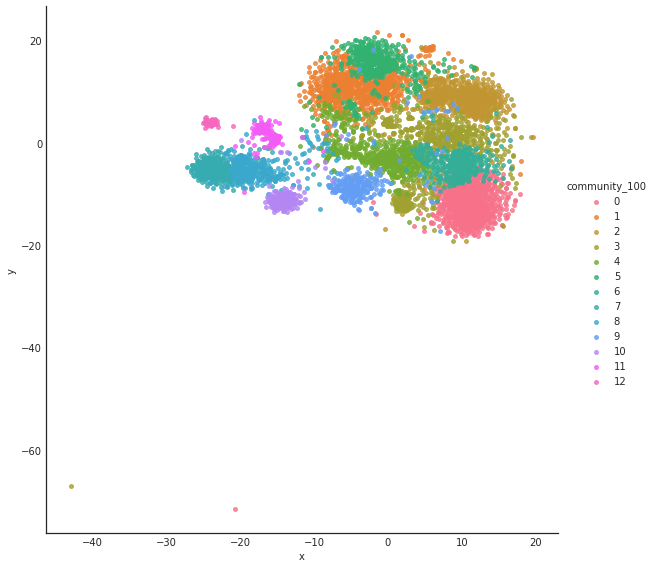

In [43]:
sns.set_style('white')

g = sns.lmplot('x', 'y', tsne_pl100_lr1000, hue='community_100', fit_reg=False, 
              scatter_kws={"s":15}, size=8)

In [44]:
#call the function
tsne_pl30_lr150 = make_tSNE(pca_df, 30, 150, community_dict)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5882 samples in 0.119s...
[t-SNE] Computed neighbors for 5882 samples in 17.598s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5882
[t-SNE] Computed conditional probabilities for sample 2000 / 5882
[t-SNE] Computed conditional probabilities for sample 3000 / 5882
[t-SNE] Computed conditional probabilities for sample 4000 / 5882
[t-SNE] Computed conditional probabilities for sample 5000 / 5882
[t-SNE] Computed conditional probabilities for sample 5882 / 5882
[t-SNE] Mean sigma: 4.340829
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.973633
[t-SNE] Error after 1000 iterations: 2.444264


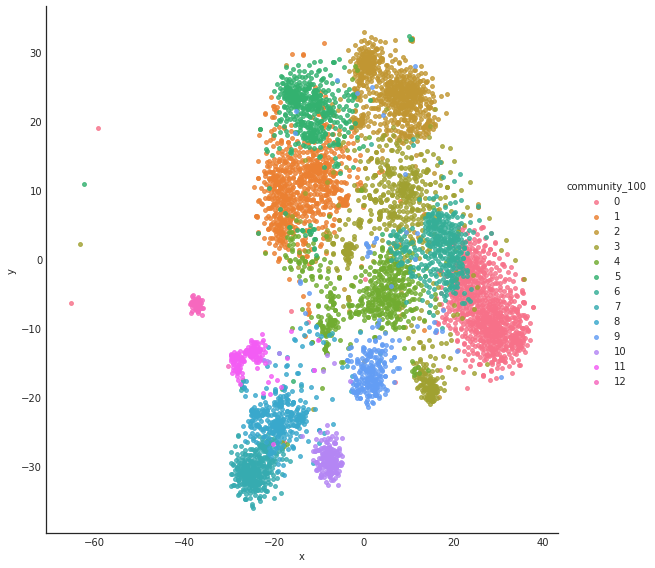

In [45]:
sns.set_style('white')

g = sns.lmplot('x', 'y', tsne_pl30_lr150, hue='community_100', fit_reg=False, 
              scatter_kws={"s":15}, size=8)